In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

# Exploratory Data Analysis

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
### Check for missing values
x

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

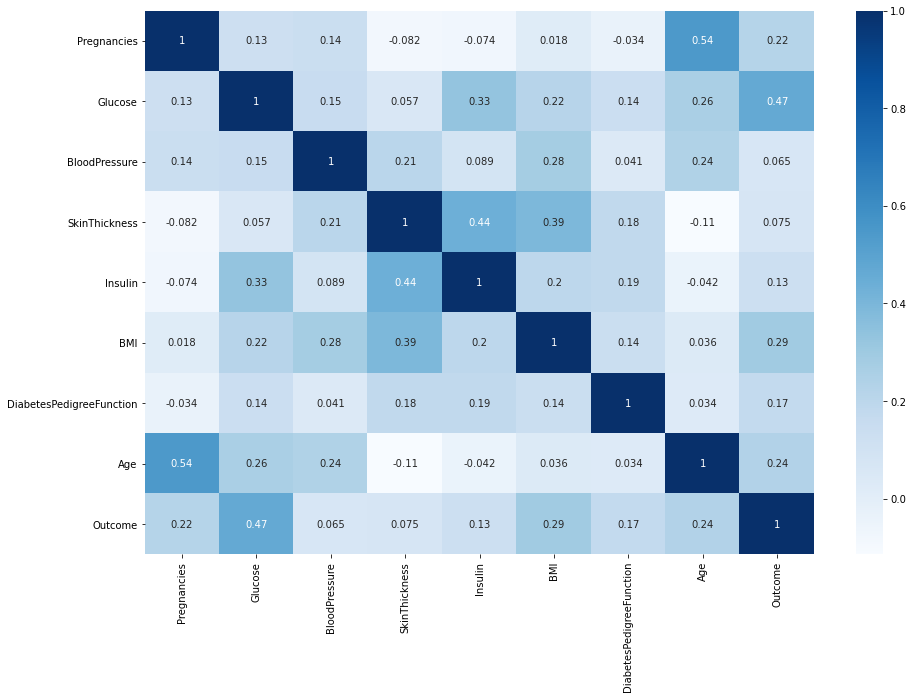

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

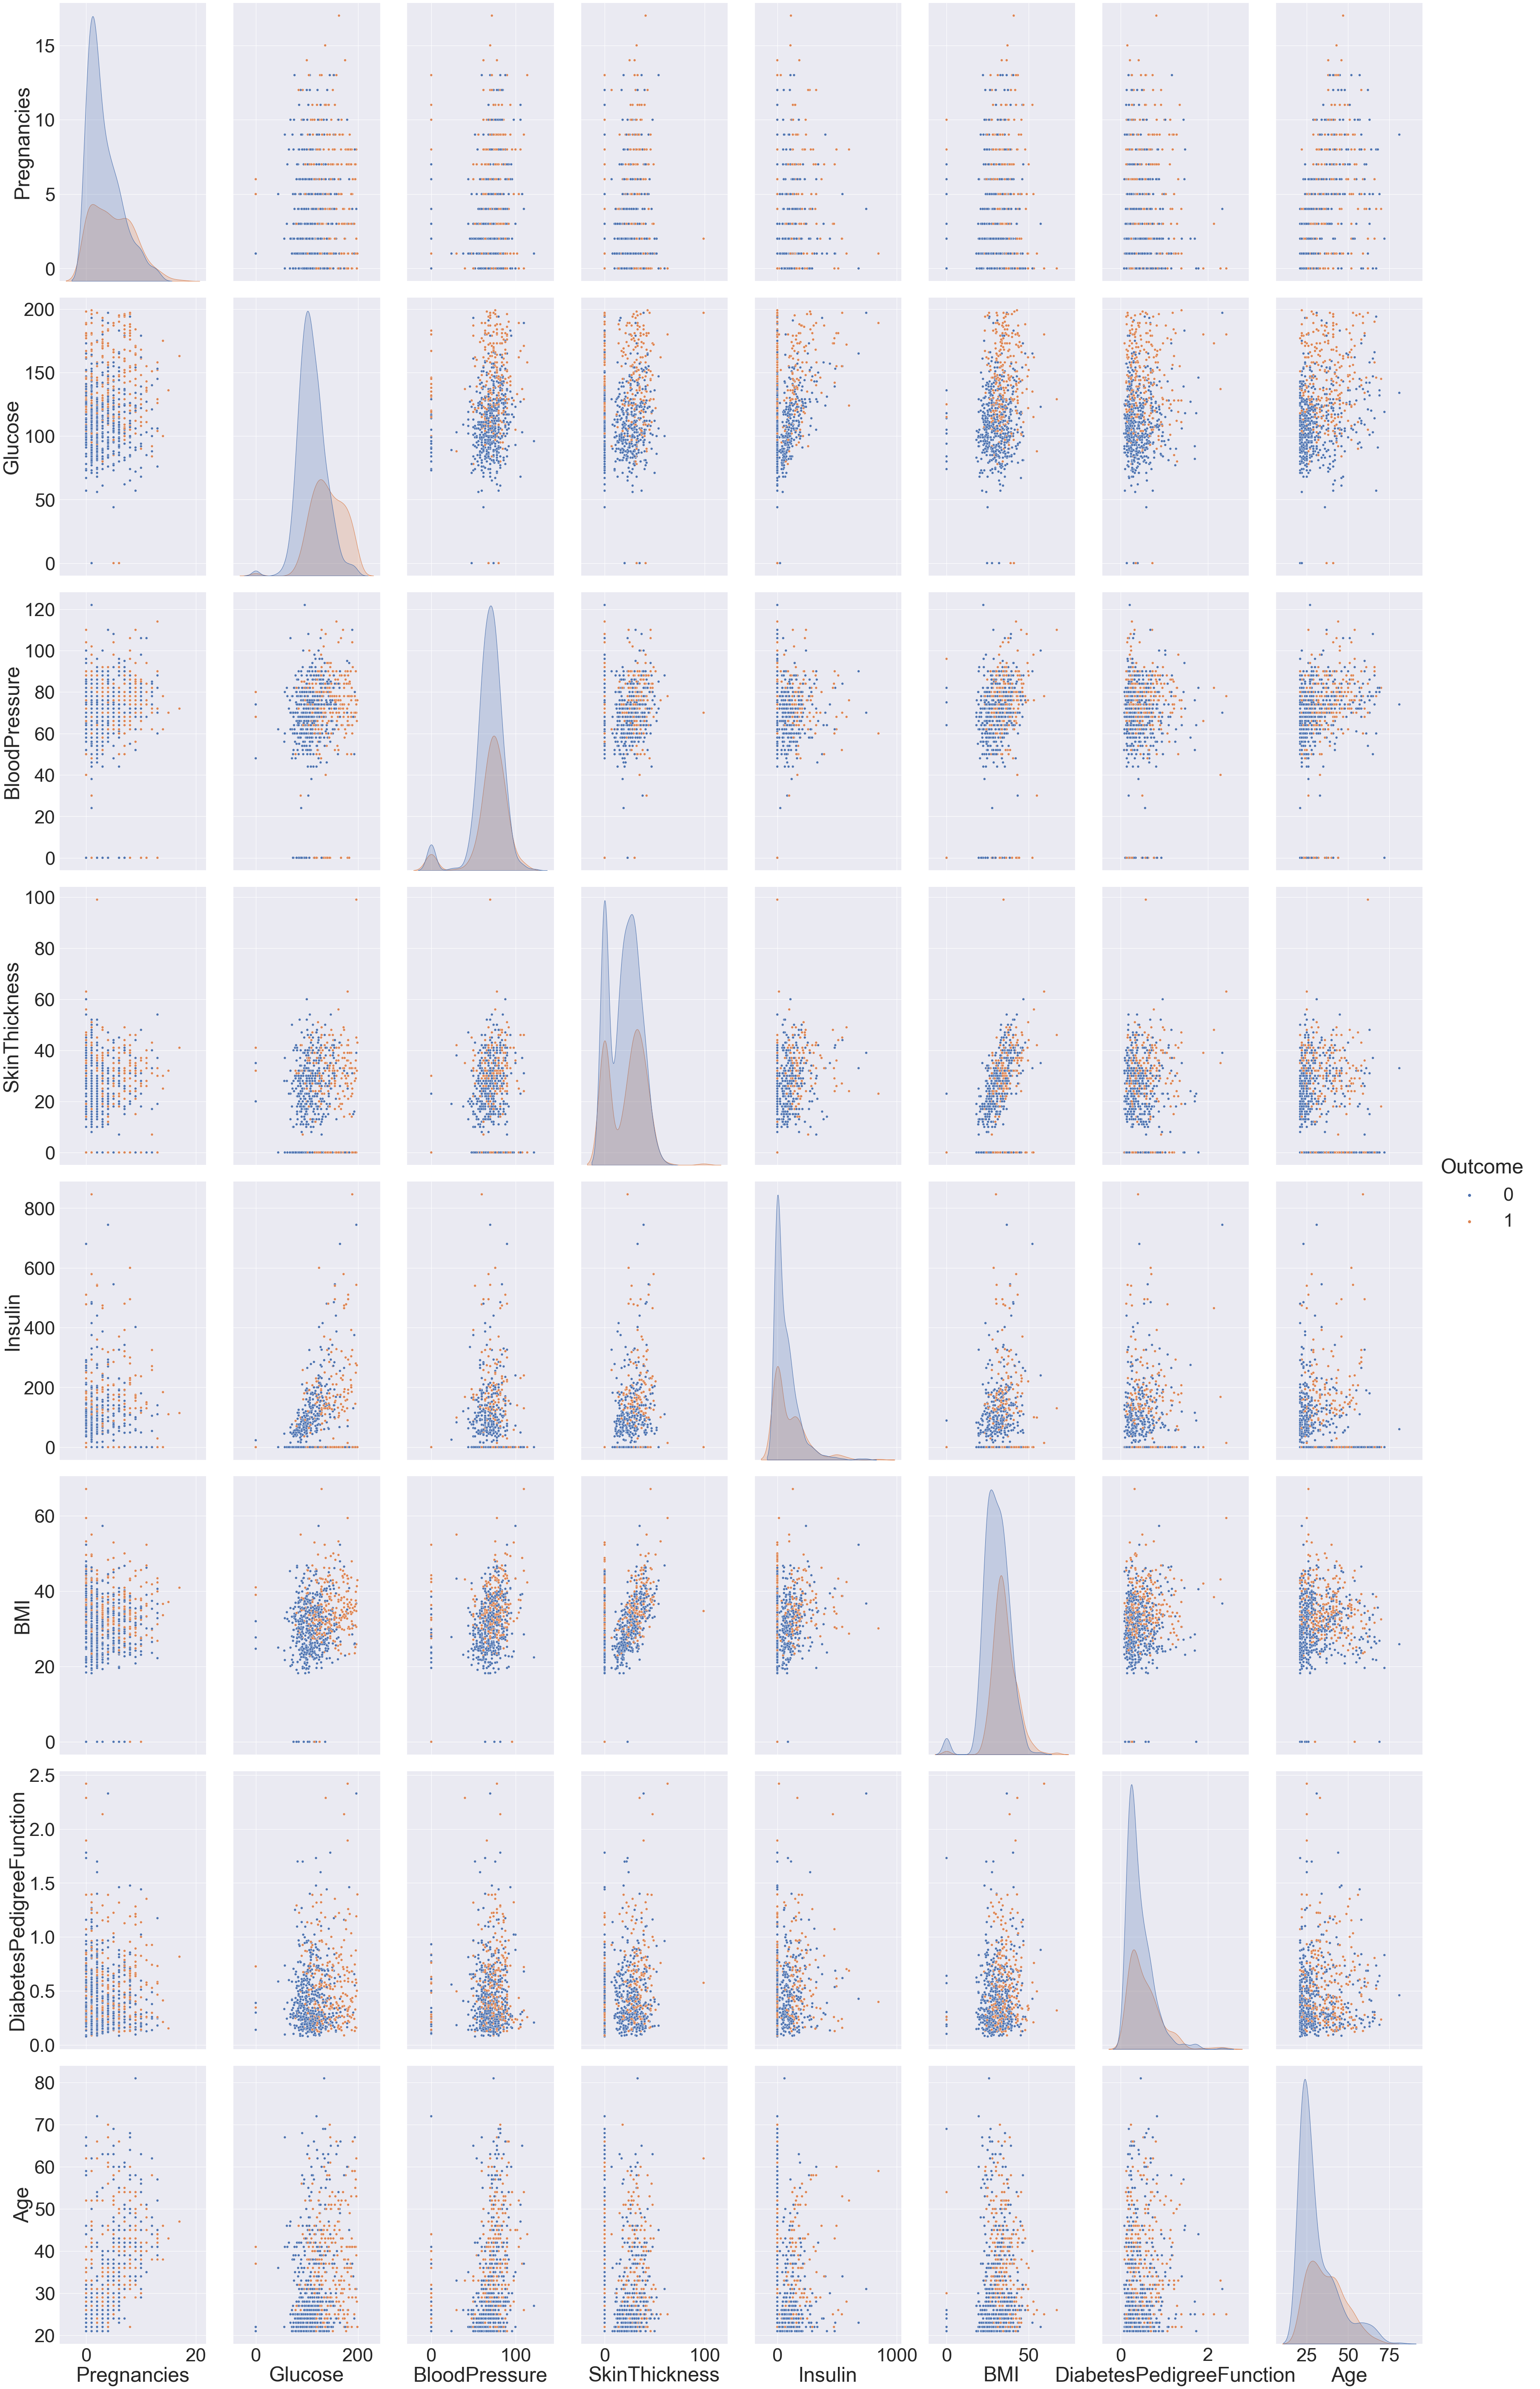

In [11]:
sns.set(font_scale=4) 
sns.pairplot(data=df, hue="Outcome", height=10, aspect=0.6)

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Machine Learning

In [13]:
X = df
Y = X['Outcome'].values
X = X.drop('Outcome', axis = 1)

In [28]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15,random_state=109) # 70% training and 30% test

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf_SVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_SVM.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_SVM = clf_SVM.predict(X_test)

# Model Accuracy: how often is the classifier correct?
SVM = round(metrics.accuracy_score(y_test, y_pred_SVM),2)

In [37]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
#sgdc = SGDClassifier(max_iter=1000, tol=0.01)
#print(sgdc)
 
sgdc.fit(X_train, y_train)

y_pred_sgdc = sgdc.predict(X_test)

# Model Accuracy: how often is the classifier correct?
SGDC = round(metrics.accuracy_score(y_test, y_pred_sgdc),2)

In [36]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier

Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train,y_train)

y_pred_N_B = Naive_Bayes.predict(X_test)

# Model Accuracy: how often is the classifier correct?
Naive_Bayes = round(metrics.accuracy_score(y_test, y_pred_N_B),2)

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
D_T = DecisionTreeClassifier()

# Train Decision Tree Classifer
D_T = D_T.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_D_T = D_T.predict(X_test)

# Model Accuracy: how often is the classifier correct?
Decision_Tree = round(metrics.accuracy_score(y_test, y_pred_D_T),2)

In [41]:
from sklearn.ensemble import RandomForestClassifier

R_F = RandomForestClassifier()

# Train Decision Tree Classifer
R_F = R_F.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_R_F = R_F.predict(X_test)

# Model Accuracy: how often is the classifier correct?
Random_Forest = round(metrics.accuracy_score(y_test, y_pred_R_F),2)

In [42]:
# MLP
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(50,100,100,50), random_state=21, alpha=0.0001, solver='sgd', \
                    verbose=False, max_iter=500)

MLP = MLP.fit(X_train,y_train)

y_pred_MLP = MLP.predict(X_test)

# Model Accuracy: how often is the classifier correct?
M_L_P = round(metrics.accuracy_score(y_test, y_pred_MLP),2)

C:\Users\Lucas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

L_D = LinearDiscriminantAnalysis()

# Train Decision Tree Classifer
L_D = L_D.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_L_D = L_D.predict(X_test)

# Model Accuracy: how often is the classifier correct?
Linear_Discriminant = round(metrics.accuracy_score(y_test, y_pred_L_D),2)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

K_N = KNeighborsClassifier()

K_N = K_N.fit(X_train,y_train)

y_pred_K_N = K_N.predict(X_test)

# Model Accuracy: how often is the classifier correct?
K_Neighbors = round(metrics.accuracy_score(y_test, y_pred_K_N),2)

In [46]:
model = ['SVM', 'SGDC', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'MLP', 'Linear Discriminant','K Neighbors']

In [47]:
Acc = [SVM, SGDC, Naive_Bayes, Decision_Tree, Random_Forest, M_L_P, Linear_Discriminant, K_Neighbors]

In [52]:
Results = pd.DataFrame({'Model': model,'Accuracy': Acc})
Results

,Model,Accuracy
0,SVM,0.74
1,SGDC,0.73
2,Naive Bayes,0.74
3,Decision Tree,0.71
4,Random Forest,0.81
5,MLP,0.74
6,Linear Discriminant,0.74
7,K Neighbors,0.75
